In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
data3 = pd.read_csv("../data/banking.csv")
data3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
data3.shape

(41188, 21)

In [18]:
data3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp_var_rate'}>,
        <AxesSubplot:title={'center':'cons_price_idx'}>,
        <AxesSubplot:title={'center':'cons_conf_idx'}>],
       [<AxesSubplot:title={'center':'euribor3m'}>,
        <AxesSubplot:title={'center':'nr_employed'}>,
        <AxesSubplot:title={'center':'y'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

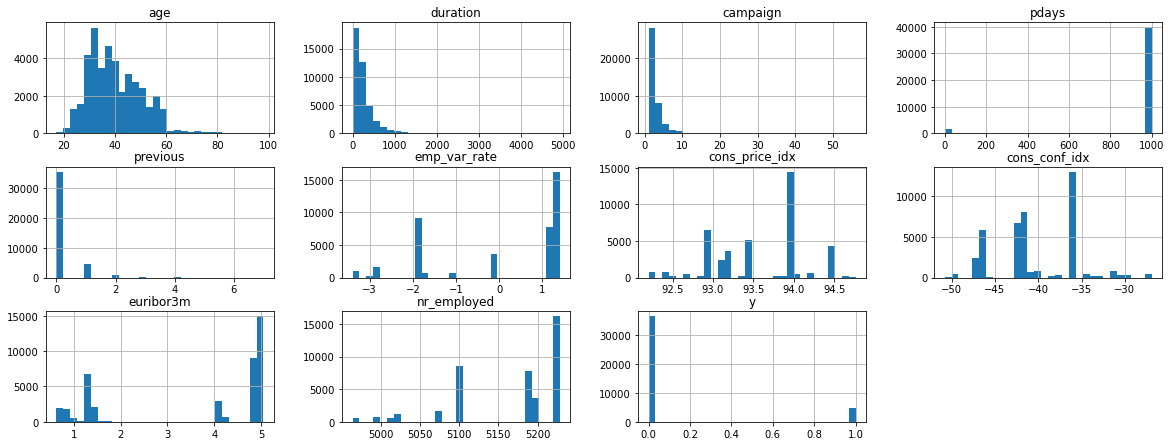

In [19]:
data3.hist(figsize=(20, 10), grid = True, layout=(4, 4), bins = 30)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
The histogram for column job



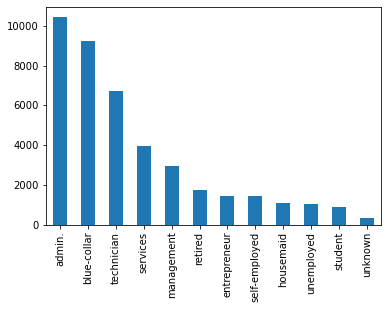


The histogram for column marital



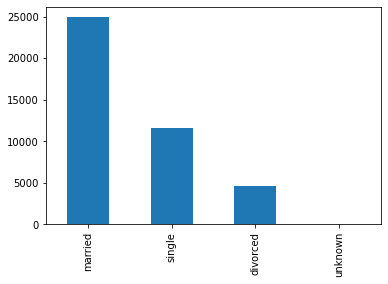


The histogram for column education



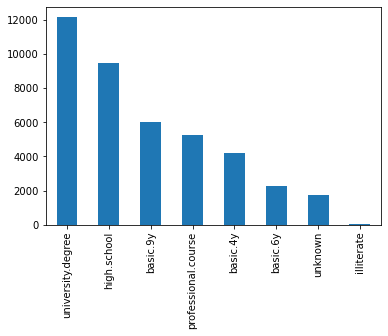


The histogram for column default



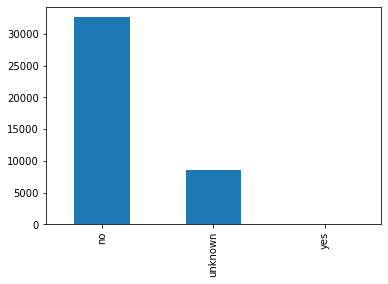


The histogram for column housing



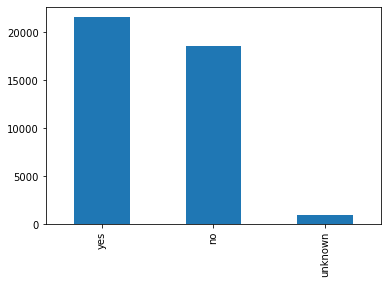


The histogram for column loan



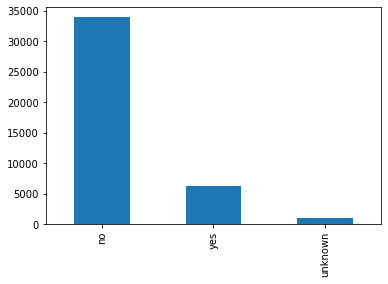


The histogram for column contact



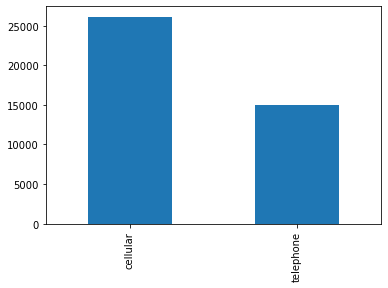


The histogram for column month



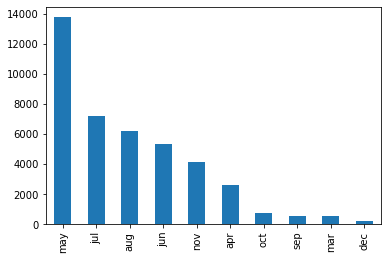


The histogram for column day_of_week



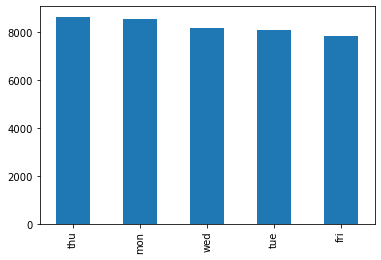


The histogram for column poutcome



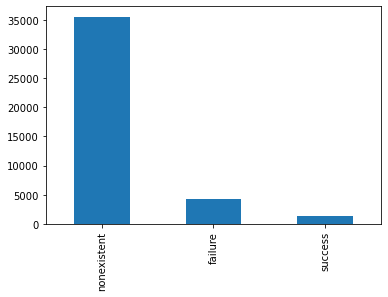

In [29]:
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
print(cat_cols)
for col in cat_cols:
    print("The histogram for column", col)
    data3[col] = data3[col].astype(str)
    print()
    data3[col].value_counts().plot(kind = "bar")
    plt.show()
    print()
